# 02 FOXN1^tdTom

## Notebook setup

In [1]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import pandas as pd
import warnings, scipy.sparse as sp, matplotlib, matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.pyplot import rc_context
from collections import Counter
import matplotlib.font_manager
import pyreadr
import rpy2
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
#import magic
#import seaborn as sns
import palantir
import loompy
#from scipy.sparse import csgraph

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['font.sans-serif'] = 'Arial'
matplotlib.rc('font', size=14)

pd.set_option('display.max_rows', 200)

sc.set_figure_params(dpi=80, dpi_save=300, color_map='Spectral_r', vector_friendly=True, transparent=True)
sc.settings.verbosity = 0 # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.
/Users/akousa/opt/anaconda3/envs/KousaJahnZhao_et_al_2023/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.20.2 scipy==1.5.3 pandas==1.4.4 scikit-learn==1.1.2 statsmodels==0.13.2 python-igraph==0.9.11 pynndescent==0.5.7


In [2]:
# preset color palettes and color maps
user_defined_palette =  [ '#F6222E', '#16FF32', '#3283FE', '#FEAF16', '#BDCDFF', '#3B00FB', '#1CFFCE', '#C075A6', '#F8A19F', '#B5EFB5', '#FBE426', '#C4451C', 
                          '#2ED9FF', '#c1c119', '#8b0000', '#FE00FA', '#1CBE4F', '#1C8356', '#0e452b', '#AA0DFE', '#B5EFB5', '#325A9B', '#90AD1C']

user_defined_cmap_markers = LinearSegmentedColormap.from_list('mycmap', ["#E6E6FF", "#CCCCFF", "#B2B2FF", "#9999FF",  "#6666FF",   "#3333FF", "#0000FF"])
user_defined_cmap_degs = LinearSegmentedColormap.from_list('mycmap', ["#0000FF", "#3333FF", "#6666FF", "#9999FF", "#B2B2FF", "#CCCCFF", "#E6E6FF", "#E6FFE6", "#CCFFCC", "#B2FFB2", "#99FF99", "#66FF66", "#33FF33", "#00FF00"])

In [3]:
%matplotlib inline 

In [4]:
def observe_variance(anndata_object):
    fig = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    # variance per principal component
    x = range(len(anndata_object.uns['pca']['variance_ratio']))
    y = anndata_object.uns['pca']['variance_ratio']
    ax1.scatter(x,y,s=4)
    ax1.set_xlabel('PC')
    ax1.set_ylabel('Fraction of variance explained\n')
    ax1.set_title('Fraction of variance explained per PC\n')
    # cumulative variance explained
    cml_var_explained = np.cumsum(anndata_object.uns['pca']['variance_ratio'])
    x = range(len(anndata_object.uns['pca']['variance_ratio']))
    y = cml_var_explained
    ax2.scatter(x,y,s=4)
    ax2.set_xlabel('PC')
    ax2.set_ylabel('Cumulative fraction of variance\nexplained')
    ax2.set_title('Cumulative fraction of variance\nexplained by PCs')
    fig.tight_layout()
    plot = plt.show
    return(plot)

In [5]:
path_to_h5ad = '../output/anndata_io/Fig1pt2_annotated.h5ad'

In [6]:
Foxn1tdTom = sc.read_h5ad(path_to_h5ad)
Foxn1tdTom.uns['log1p']["base"] = None

In [7]:
path_to_h5ad = '../output/anndata_io/Fig1pt1_annotated.h5ad'

In [8]:
adata_d0 = sc.read_h5ad(path_to_h5ad)
adata_d0.uns['log1p']["base"] = None

In [9]:
with_Foxn1tdTom = sc.concat(
    [adata_d0, Foxn1tdTom], # add more annadata objects here separated by commas
    join='outer', 
    label = 'dataset', 
    keys = ['ours', 'Foxn1-lin'], # or use your sample_names list (as used above) here. 
    # Make sure the order of the batch categories matches that of the AnnData objects 
    index_unique = '@'
)

In [10]:
with_Foxn1tdTom.obs['dataset'] = ['lineage' if 'Foxn1' in x else 'lineage_wt' if 'wt' in x else 'ours' for x in with_Foxn1tdTom.obs['sample']]

In [11]:
with_Foxn1tdTom.obs['stage'] = ['02mo' if 'mo02' in x else '20mo' if 'mo20' in x else '18mo' for x in with_Foxn1tdTom.obs['sample']]

In [12]:
with_Foxn1tdTom.obs['stage'] = ['02mo' if 'mo02' in x else '20mo' if 'mo20' in x else '18mo' for x in with_Foxn1tdTom.obs['sample']]

In [13]:
with_Foxn1tdTom.obs['sex'] = ['male' if '_m' in x else 'female' for x in with_Foxn1tdTom.obs['sample']]

In [14]:
with_Foxn1tdTom.uns['dataset_colors']=['blue', 'grey', 'grey80']

In [15]:
with_Foxn1tdTom.uns['stage_colors']= ['#76D6FF', '#FF8072', '#FF5A5F']

In [16]:
with_Foxn1tdTom.uns['sex_colors'] = [  '#FBE426', '#C4451C']

In [17]:
with_Foxn1tdTom.uns['cell_type_colors'] = ['#d62728','#19c9b3', '#FFA5D2', '#ff7f0e','#199919', '#aa40fc']

In [18]:
with_Foxn1tdTom.uns['cell_type_subset_colors'] = ['#F6222E', '#3283FE', '#16FF32',  '#BDCDFF', '#AA0DFE','#1CFFCE', '#d62728', '#19c9b3','#FFA5D2',   'grey', '#2ED9FF', '#c1c119', '#8b0000', '#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7','#FEAF16', '#325A9B', '#C075A6']

In [19]:
sc.pp.highly_variable_genes(with_Foxn1tdTom, n_top_genes=3500, n_bins=20, flavor='seurat',  inplace=True)

In [20]:
rng = np.random.RandomState(42)
sc.tl.pca(with_Foxn1tdTom, n_comps=200, svd_solver='arpack', random_state=rng)

<function matplotlib.pyplot.show(close=None, block=None)>

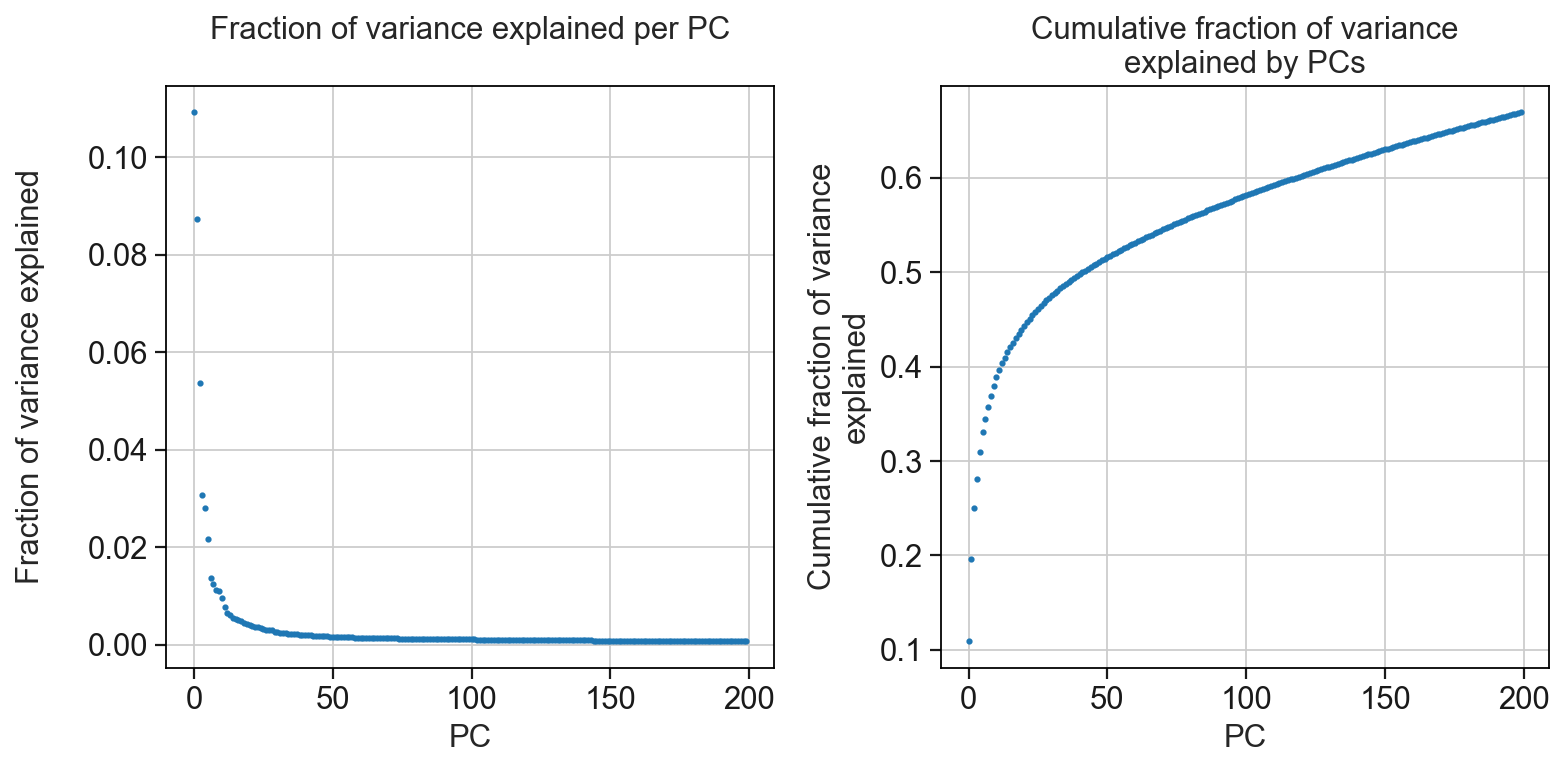

In [21]:
observe_variance(with_Foxn1tdTom)

In [22]:
rng = np.random.RandomState(42)
sc.tl.pca(with_Foxn1tdTom, n_comps=55, svd_solver='arpack', random_state=rng)

### Integrating data using harmony

In [23]:
sce.pp.harmony_integrate(with_Foxn1tdTom, 'sample')

2024-04-08 15:48:18,322 - harmonypy - INFO - Iteration 1 of 10
2024-04-08 15:48:25,546 - harmonypy - INFO - Iteration 2 of 10
2024-04-08 15:48:32,537 - harmonypy - INFO - Iteration 3 of 10
2024-04-08 15:48:39,507 - harmonypy - INFO - Iteration 4 of 10
2024-04-08 15:48:46,701 - harmonypy - INFO - Iteration 5 of 10
2024-04-08 15:48:53,649 - harmonypy - INFO - Converged after 5 iterations


In [24]:
sc.pp.neighbors(with_Foxn1tdTom, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(with_Foxn1tdTom)

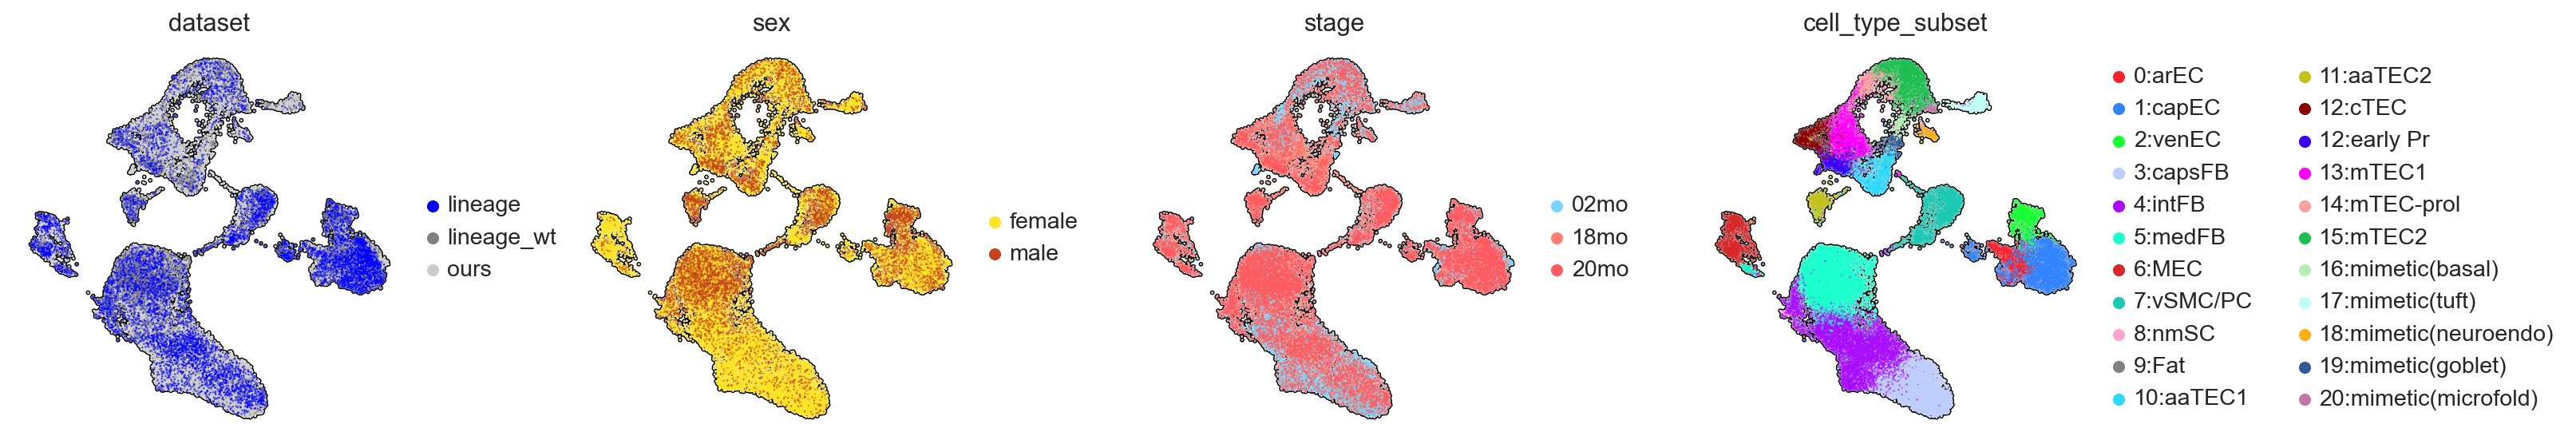

In [25]:
sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

sc.pl.umap(
    with_Foxn1tdTom, 
    color=['dataset','sex', 'stage', 'cell_type_subset'], 
    color_map='Spectral_r',
    use_raw=False, 
    ncols=4, 
    wspace = 0.3,
    outline_width=[0.6, 0.05], 
    size=5,
    frameon=False, 
    add_outline=True, 
    sort_order = False)

In [26]:
import re

In [27]:
with_Foxn1tdTom.obs['stage_and_subset'] = ''
with_Foxn1tdTom.obs['stage_and_subset'] = with_Foxn1tdTom.obs[['stage', 'cell_type_subset']].agg('_'.join, axis=1)

In [46]:
writer = pd.ExcelWriter('adata_18vs02mo_d0_wilcox+TECLin.xlsx', engine='xlsxwriter')

for subset in ["0:arEC", "1:capEC", "2:venEC", "3:capsFB", "4:intFB", "5:medFB", "6:MEC", "7:vSMC/PC", "8:nmSC","9:Fat", "10:aaTEC1",  "11:aaTEC2",  "12:cTEC", "12:early Pr",         
              "13:mTEC1", "14:mTEC-prol", "15:mTEC2", "16:mimetic(basal)", "17:mimetic(tuft)", "18:mimetic(neuroendo)", "19:mimetic(goblet)", "20:mimetic(microfold)"]:   
    sc.tl.rank_genes_groups(with_Foxn1tdTom, 'stage_and_subset', groups=['18mo_'+subset], reference='02mo_'+subset, method='wilcoxon', use_raw=False)
    result = with_Foxn1tdTom.uns['rank_genes_groups']
    groups = result['names'].dtype.names
    pd.DataFrame(
        {group + '_' + key[:1]: result[key][group]
        for group in groups for key in ['names', 'scores', 'logfoldchanges', 'pvals_adj']}).to_excel(writer, sheet_name=re.search('.*:(.+)', subset).group(1).replace('/', '-'))
        
writer.save()

### Isolate TEC_d0 + Foxn1tdTom

In [28]:
TEC_with_Foxn1tdTom = with_Foxn1tdTom[with_Foxn1tdTom.obs['cell_type']=='TEC']

In [29]:
TEC_with_Foxn1tdTom.obs['distinct'] = ''
TEC_with_Foxn1tdTom.obs['distinct'] = TEC_with_Foxn1tdTom.obs[['stage', 'dataset']].agg(' '.join, axis=1)

/var/folders/yr/0_lgn5q107n7hthkgy5vt7p40000gq/T/ipykernel_18387/2061337811.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  TEC_with_Foxn1Lin.obs['distinct'] = ''


In [30]:
crosstb = pd.crosstab(TEC_with_Foxn1tdTom.obs['distinct'], TEC_with_Foxn1tdTom.obs['cell_type_subset'], normalize='index')

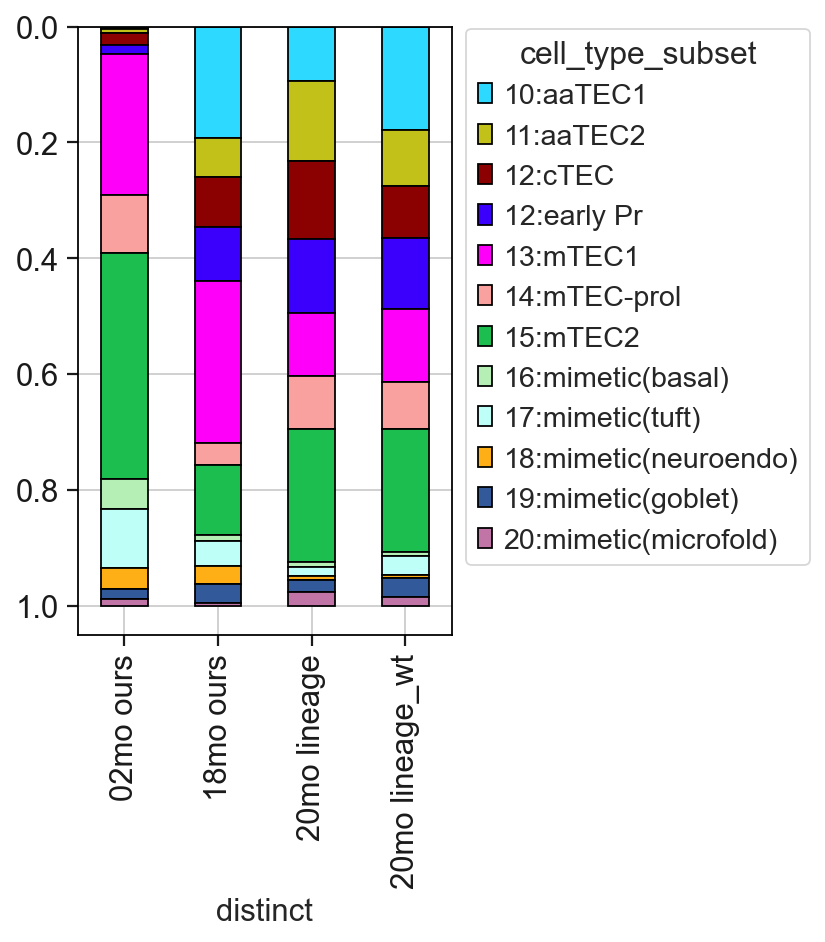

In [31]:
plt.rcParams['figure.figsize'] = [3, 5]

ax = crosstb.plot(kind='bar', stacked=True, edgecolor = "black", color=TEC_with_Foxn1tdTom.uns['cell_type_subset_colors'])
ax.invert_yaxis()
ax.legend(title='cell_type_subset', bbox_to_anchor=(1, 1.02), loc='upper left')

In [32]:
# Remove columns with all 0s
sc.pp.filter_genes(TEC_with_Foxn1tdTom, min_cells=1)

In [33]:
TEC_with_Foxn1tdTom.shape

(8624, 28247)

In [34]:
TEC_with_Foxn1tdTom[TEC_with_Foxn1tdTom.obs['dataset']=='lineage'].shape

(1210, 28247)

In [35]:
TEC_with_Foxn1tdTom[TEC_with_Foxn1tdTom.obs['dataset']=='ours'].shape

(6175, 28247)

In [36]:
sc.pp.highly_variable_genes(TEC_with_Foxn1tdTom, n_top_genes=3500, n_bins=20, flavor='seurat')

In [37]:
rng = np.random.RandomState(42)
sc.tl.pca(TEC_with_Foxn1tdTom, n_comps=70, svd_solver='arpack', random_state=rng, use_highly_variable=True)
sce.pp.harmony_integrate(TEC_with_Foxn1tdTom, 'sample')
sc.pp.neighbors(TEC_with_Foxn1tdTom, n_neighbors=15, use_rep='X_pca_harmony')
sc.tl.umap(TEC_with_Foxn1tdTom)

2024-04-08 15:49:50,881 - harmonypy - INFO - Iteration 1 of 10
2024-04-08 15:49:52,212 - harmonypy - INFO - Iteration 2 of 10
2024-04-08 15:49:53,565 - harmonypy - INFO - Iteration 3 of 10
2024-04-08 15:49:54,884 - harmonypy - INFO - Iteration 4 of 10
2024-04-08 15:49:56,332 - harmonypy - INFO - Iteration 5 of 10
2024-04-08 15:49:57,741 - harmonypy - INFO - Converged after 5 iterations


In [38]:
TEC_with_Foxn1tdTom.uns['cell_type_subset_colors'] = ['#2ED9FF', '#c1c119',  '#8b0000','#3B00FB', '#FE00FA', "#F8A19F", '#1CBE4F','#B5EFB5', '#BEFFF7' ,'#FEAF16', '#325A9B', '#C075A6']

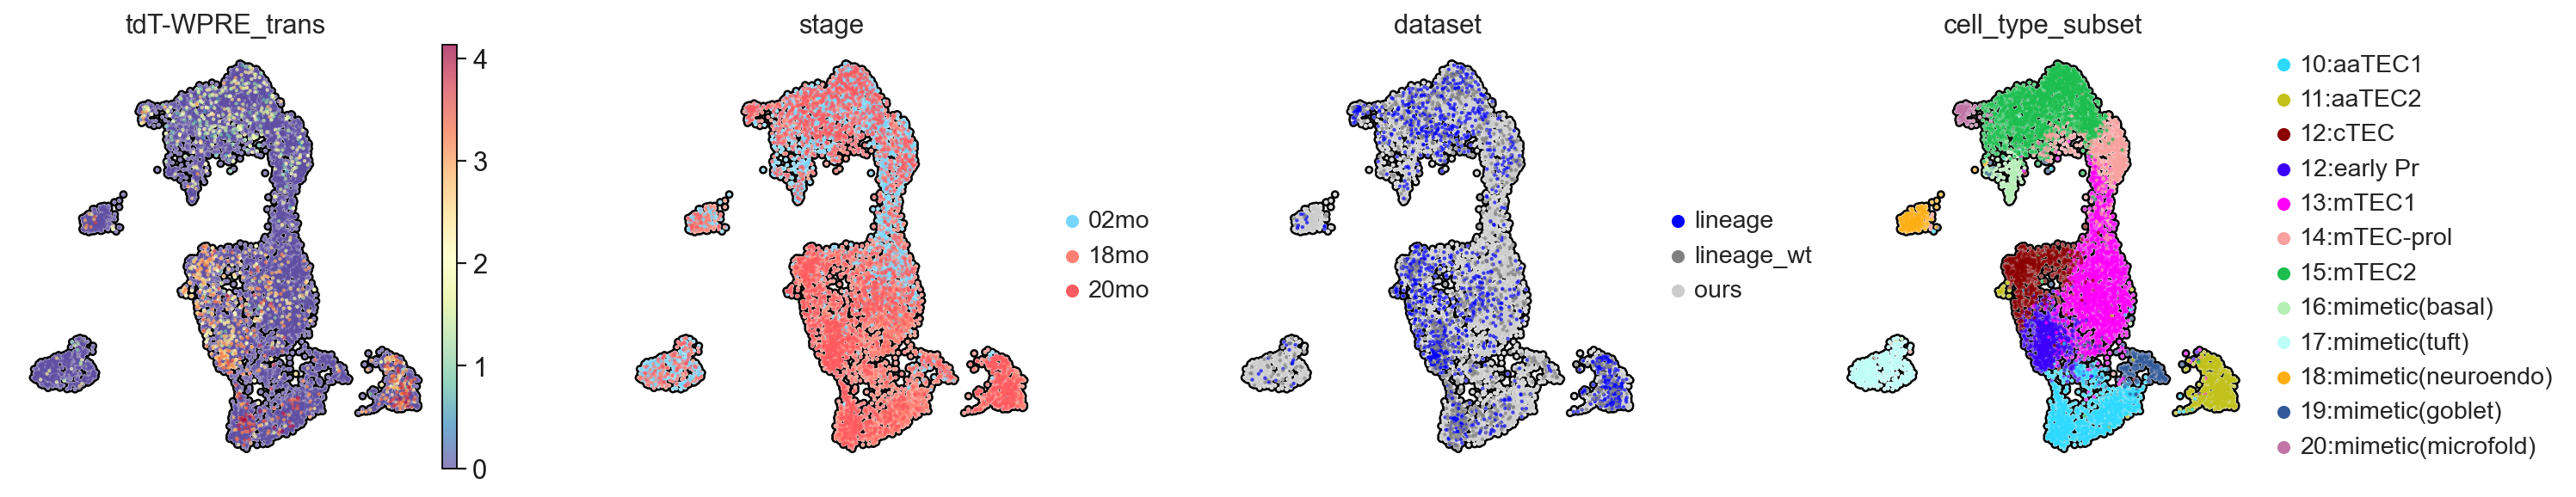

In [39]:
TEC_with_Foxn1tdTom.uns['stage_colors']= ['#76D6FF', '#FF8072', '#FF5A5F']

sc.set_figure_params(dpi=80, dpi_save=300, color_map='viridis', vector_friendly=True, transparent=True)

sc.pl.umap(
    TEC_with_Foxn1tdTom, 
    color=['tdT-WPRE_trans', 'stage', 'dataset', 'cell_type_subset'], 
    color_map='Spectral_r',
    use_raw=False, 
    ncols=5, 
    wspace = 0.3,
    outline_width=[0.6, 0.05], 
    size=15,
    na_color='white',
    frameon=False, 
    add_outline=True
)